<a href="https://colab.research.google.com/github/yadavrahyl2k15/dealing-with-missing-values/blob/master/DEALING_WITH_CATEGORICAL_FEATURES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FREQUENT CATEGORY IMPUTATION


In [1]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv("/content/train (1).csv",usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [4]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [6]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

In [7]:
###COMPUTE THE FREQUENCY OF FEATURES

In [9]:
df.groupby(['BsmtQual'])['BsmtQual'].count()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

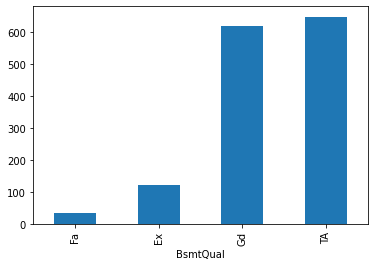

In [11]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=True).plot.bar()

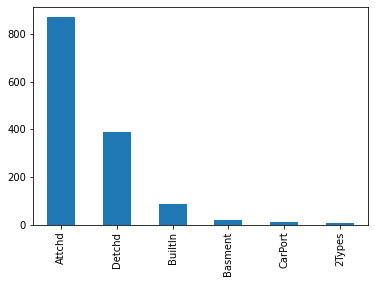

In [12]:
df['GarageType'].value_counts().plot.bar()

In [17]:
df['GarageType'].value_counts().index[0]

'Attchd'

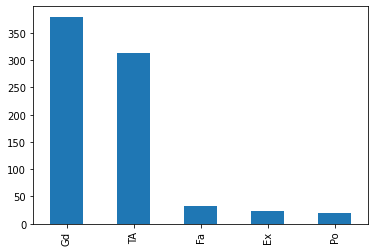

In [13]:
df['FireplaceQu'].value_counts().plot.bar()

In [14]:
###replacing function

In [20]:
def imput_nan(df,variable):
  most_frequent_type=df[variable].value_counts().index[0]
  df[variable].fillna(most_frequent_type,inplace=True)

In [21]:
for features in ['BsmtQual','GarageType','FireplaceQu']:
  imput_nan(df,features)

In [22]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

also instead of value_counts we can use mode()

**ADVANTAGES**

1.   EASY TO IMPLEMENT
2.   FAST TO IMPLEMENT

**DISADVANTAGES**

1.   SINCE WE ARE USING MORE FREQUEN LABELS,IT MAY USE THEM IN OVER REPRESENTED WAYS IF THERE ARE MANY Nan
2.   IT DISTORTS THE RELATION OF MOST FREQUENT LABEL





SUPPOSE WE HAVE MORE FREQUENT CATEGORIES,WE JUST REPLACE NaN WITH A NEW CATEGORY

In [23]:
df=pd.read_csv("/content/train (1).csv",usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [24]:
def imput_naa(data,variable):
  data[variable+"_newvar"]=np.where(data[variable].isnull(),'missing',data[variable])

In [25]:
for features in ["BsmtQual",'FireplaceQu','GarageType']:
  imput_naa(df,features)

In [26]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,Gd,NaN,Attchd,208500,Gd,missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [27]:
df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)

,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,208500,Gd,missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
...,...,...,...,...
1455,175000,Gd,TA,Attchd
1456,210000,Gd,TA,Attchd
1457,266500,TA,Gd,Attchd
1458,142125,TA,missing,Attchd


ONE HOT CODING"

In [28]:
data=pd.read_csv("/content/titanic_train.csv",usecols=['Sex'])

In [29]:
data.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [30]:
pd.get_dummies(data,drop_first=True).head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [31]:
data=pd.read_csv("/content/titanic_train.csv",usecols=['Embarked'])

In [32]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [33]:
data.dropna(inplace=True)

In [34]:
pd.get_dummies(data,drop_first=True)

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [35]:
#onehotcoding with many categories

In [37]:
df=pd.read_csv('/content/test.csv',usecols=['X0','X1','X2','X3','X4','X5','X6'])
df.head()

,X0,X1,X2,X3,X4,X5,X6
0,az,v,n,f,d,t,a
1,t,b,ai,a,d,b,g
2,az,v,as,f,d,a,j
3,az,l,n,f,d,z,l
4,w,s,as,c,d,y,i


In [45]:
for col in df.columns:
  print(col,":",len(df[col].unique()),'labels')

X0 : 49 labels
X1 : 27 labels
X2 : 45 labels
X3 : 7 labels
X4 : 4 labels
X5 : 32 labels
X6 : 12 labels


In [47]:
for col in df.columns:
  top_10=[x for x in df[col].value_counts().sort_values(ascending=False).head(10).index]

In [50]:
def one_hot_encoding(df,variable,top_10):
  for label in top_10:
    df[variable+"_"+ label]=np.where(df[variable]==label,1,0)

In [51]:
df.head()

,X0,X1,X2,X3,X4,X5,X6
0,az,v,n,f,d,t,a
1,t,b,ai,a,d,b,g
2,az,v,as,f,d,a,j
3,az,l,n,f,d,z,l
4,w,s,as,c,d,y,i


In [52]:
top_10

['g', 'j', 'd', 'i', 'l', 'h', 'a', 'k', 'c', 'f']

In [54]:
one_hot_encoding(df,'X0',top_10)

In [55]:
df.head()

,X0,X1,X2,X3,X4,X5,X6,X0_g,X0_j,X0_d,X0_i,X0_l,X0_h,X0_a,X0_k,X0_c,X0_f
0,az,v,n,f,d,t,a,0,0,0,0,0,0,0,0,0,0
1,t,b,ai,a,d,b,g,0,0,0,0,0,0,0,0,0,0
2,az,v,as,f,d,a,j,0,0,0,0,0,0,0,0,0,0
3,az,l,n,f,d,z,l,0,0,0,0,0,0,0,0,0,0
4,w,s,as,c,d,y,i,0,0,0,0,0,0,0,0,0,0
